# Training Cats & Dogs classifier

## Downloading cats and dogs datasets

The cats vs. dogs dataset that we will use isn’t packaged with Keras. It was made available by Kaggle.com as part of a computer vision competition in late 2013, back when convnets weren’t quite mainstream. You can download the original dataset at: www.kaggle.com/c/dogs-vs-cats/data (you will need to create a Kaggle account if you don’t already have one—don’t worry, the process is painless).


In [1]:
# imports
import sys
import os, shutil
import numpy as np

# keras imports 
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# visualization imports
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


## Copying images to train, validation and test directories

In [2]:
def create_directory(path_to_dir):
    if not os.path.exists(path_to_dir): os.mkdir(path_to_dir)

# Download the data from kaggle website as mentioned above'
# extract all the zip files in dataset to the current folder
        
# The path to the directory where the original
# dataset was uncompressed
dir_path =  os.getcwd()

original_dataset_dir = dir_path+'/dogs-vs-cats/train'
# The directory where we will
# store our smaller dataset
base_dir = dir_path + '/cats_and_dogs_small'
create_directory(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
create_directory(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
create_directory(validation_dir)
test_dir = os.path.join(base_dir, 'test')
create_directory(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
create_directory(train_cats_dir)
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
create_directory(train_dogs_dir)
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
create_directory(validation_cats_dir)
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
create_directory(validation_dogs_dir)
# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
create_directory(test_cats_dir)
# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
create_directory(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Instantiating a small convnet for cats vs. dogs classification

In [3]:
# model srchitecture development
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Using ImageDataGenerator to read images from directories & model training

In [4]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 7s 75ms/step - loss: 0.6921 - acc: 0.5270 - val_loss: 0.6702 - val_acc: 0.6130
Epoch 2/30
100/100 [==============================] - 6s 57ms/step - loss: 0.6549 - acc: 0.6145 - val_loss: 0.6768 - val_acc: 0.5300
Epoch 3/30
100/100 [==============================] - 6s 55ms/step - loss: 0.6060 - acc: 0.6745 - val_loss: 0.6075 - val_acc: 0.6680
Epoch 4/30
100/100 [==============================] - 6s 56ms/step - loss: 0.5646 - acc: 0.7085 - val_loss: 0.6106 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 6s 57ms/step - loss: 0.5401 - acc: 0.7195 - val_loss: 0.6254 - val_acc: 0.6480
Epoch 6/30
100/100 [==============================] - 6s 55ms/step - loss: 0.5175 - acc: 0.7545 - val_loss: 0.5666 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 6s 56ms/step - loss: 0.4922 - acc: 0.7630 - val_loss: 0.6295 - v

In [7]:
# function to plot model training logs
def plot_model_training_history(history_dict, plot_val=True,chart_type="--o"):
    acc = history_dict['acc']
    loss = history_dict['loss']
    
    if plot_val:
        val_acc = history_dict['val_acc']
        val_loss = history_dict['val_loss']
    epochs = range(1, len(acc) + 1)

    # visualize model training
    epochs = range(1, len(acc) + 1)
    fig, axs = plt.subplots(1, 2,figsize=(15,5))
    axs[0].plot(epochs, loss, chart_type, label='Training loss')
    if plot_val:
        axs[0].plot(epochs, val_loss, chart_type, label='Validation loss')
        axs[0].set_title('training & validation loss')
    else:
        axs[0].set_title('training loss')
                               
    axs[1].plot(epochs, acc, chart_type, label='Training acc')
    if plot_val:
        axs[1].plot(epochs, val_acc, chart_type, label='Validation acc')
        axs[1].set_title('training & validation accuracy')                      
    else:
        axs[1].set_title('training accuracy')                      

    plt.show()
    plt.close()

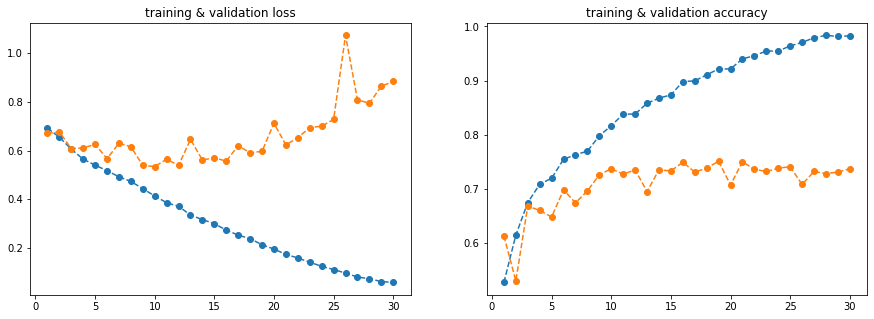

In [8]:
plot_model_training_history(history.history,plot_val=True)

## Setting up a data augmentation configuration via ImageDataGenerator

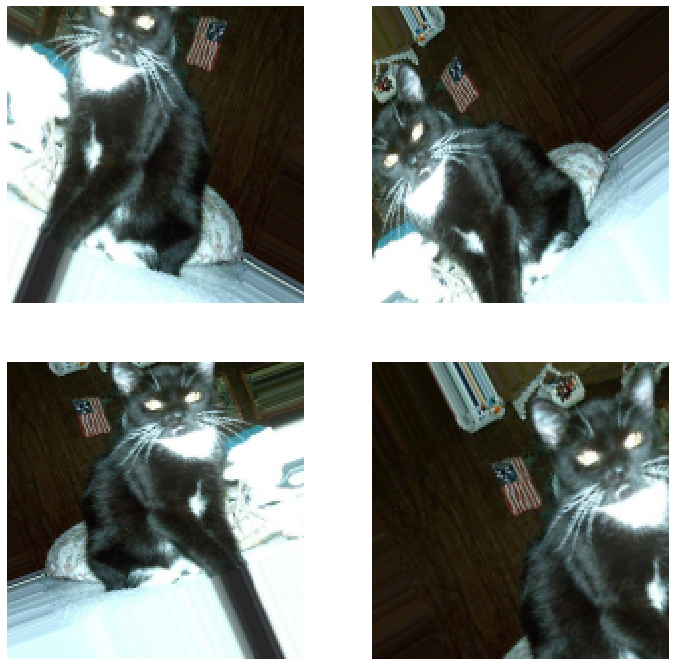

In [4]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# This is module with image preprocessing utilities
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# We pick one image to "augment"
img_path = fnames[3]
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
# Convert it to a Numpy array with shape (150, 150, 3)
x_ = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
x = x_.reshape((1,) + x_.shape)
# The .flow() command below generates batches of randomly transformed images. # It will loop indefinitely, so we need to `break` the loop at some point! i= 0
i=0
plt.figure(figsize=(12,12))
for batch in datagen.flow(x, batch_size=1):
    ax = plt.subplot(2, 2, i + 1)
    ax.set_aspect('equal')
    plt.axis("off")
    ax.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break        
plt.show()
plt.close()

## Defining a new convnet that includes dropout & training with augmented data

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))   # controls regularisation to prevent overfitting
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# choose a batch size as per system configuration 
batch_size = 32

# Training our convnet using data augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=batch_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 20s 195ms/step - loss: 0.6919 - acc: 0.5241 - val_loss: 0.6832 - val_acc: 0.5076
Epoch 2/100
100/100 [==============================] - 18s 175ms/step - loss: 0.6811 - acc: 0.5581 - val_loss: 0.6600 - val_acc: 0.5915
Epoch 3/100
100/100 [==============================] - 18s 175ms/step - loss: 0.6669 - acc: 0.5697 - val_loss: 0.6620 - val_acc: 0.5799
Epoch 4/100
100/100 [==============================] - 18s 178ms/step - loss: 0.6475 - acc: 0.6066 - val_loss: 0.6541 - val_acc: 0.5966
Epoch 5/100
100/100 [==============================] - 18s 179ms/step - loss: 0.6363 - acc: 0.6297 - val_loss: 0.6128 - val_acc: 0.6605
Epoch 6/100
100/100 [==============================] - 18s 178ms/step - loss: 0.6178 - acc: 0.6444 - val_loss: 0.5982 - val_acc: 0.6707
Epoch 7/100
100/100 [==============================] - 18s 178ms/step - loss: 0.6085 - acc: 0.6675 -

100/100 [==============================] - 18s 175ms/step - loss: 0.4050 - acc: 0.8166 - val_loss: 0.4706 - val_acc: 0.7792
Epoch 61/100
100/100 [==============================] - 18s 176ms/step - loss: 0.4124 - acc: 0.8047 - val_loss: 0.4434 - val_acc: 0.7867
Epoch 62/100
100/100 [==============================] - 17s 175ms/step - loss: 0.3910 - acc: 0.8256 - val_loss: 0.4192 - val_acc: 0.8115
Epoch 63/100
100/100 [==============================] - 17s 174ms/step - loss: 0.3975 - acc: 0.8191 - val_loss: 0.4480 - val_acc: 0.8054
Epoch 64/100
100/100 [==============================] - 17s 174ms/step - loss: 0.3936 - acc: 0.8216 - val_loss: 0.4734 - val_acc: 0.7822
Epoch 65/100
100/100 [==============================] - 17s 175ms/step - loss: 0.4137 - acc: 0.8131 - val_loss: 0.4266 - val_acc: 0.8109
Epoch 66/100
100/100 [==============================] - 17s 175ms/step - loss: 0.3893 - acc: 0.8225 - val_loss: 0.4321 - val_acc: 0.8099
Epoch 67/100
100/100 [==============================] 

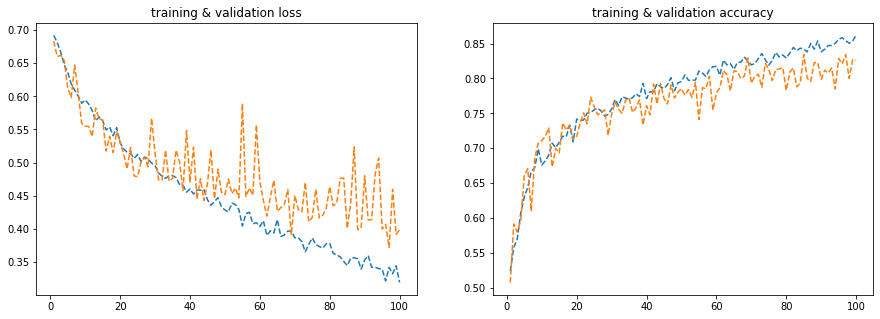

In [9]:
# plot model history
plot_model_training_history(history.history,chart_type="--")

########### save the model #################
# model.save('cats_and_dogs_small_2.h5')
############################################